<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#practical_plan">Practical overview</a></li>
        <li><a href="#reading_data">Imports and reading data </a></li>
        <li><a href="#knn">Classification with K-nearest Neighbours </a></li>
        <li><a href="#task1">Task 1: Implementing a KNN classifier with n = 100</a></li>
        <li><a href="#task2">Task 2: Implementing an SVM classifier</a></li>      
    </ol>
</div>
<br>
<hr>

<h2 id="practical_plan">Practical overview </h2>

In this tutorial, we will be implementing a supervised machine learning classifier to predict the type of cancer from the bc_decoded data. We will do so using two models: 

    1. K-Nearest Neighbour Classifier
    2. Support Vector Machines (SVM)
    
We haven't covered KNN in our lectures. It's a very easy/lazy algorithm based on the neighbourhood concept of K-Means. You can learn most of what you need to know about KNN from the following video:  
    - https://www.youtube.com/watch?v=MDniRwXizWo

<h2 id="reading_data">Imports and reading data  </h2>

- Remember: Scikit-learn is organised in sublibraries (or modules):
    - The sklearn.neighbors module implements KNN (KNeighborsClassifier)
    - The sklearn.model_selection module contains functions to split the data between training and testing.
    - The sklearn.metrics module contains all performance estimators and metrics
    - The svm module is a wrapper containing submodules for the SVM algoroithms. SVC is a support vector classifier in the module. 


    

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
path_to_file ="/Users/babylon/Documents/Teaching/ML/ML2022/Day1/Practicals/bc_encoded.csv"
bc_data = pd.read_csv(path_to_file, encoding='utf-8')

In [26]:
bc_data.head()

,Unnamed: 0,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,5,1,1,1,2,1.0,3,1,1,0
1,1,5,4,4,5,7,10.0,3,2,1,0
2,2,3,1,1,1,2,2.0,3,1,1,0
3,3,6,8,8,1,3,4.0,3,7,1,0
4,4,4,1,1,3,2,1.0,3,1,1,0


<h2 id="knn">Supervised Learning Using a K-Nearest Neighbours   </h2>

- Recall that supervised learning aims to predict the outcome for unknown cases. 
- The life cycle of a supervised learning: 
    - Select the features that will be used for prediction. We will use all the features as before. 
    - Decide on the outcome (in our case, it is hospital_mortality)
    - Split the data into training and testing sets where: 
        - The training set will be used to train the algorithm
        - The test set is assumed to contain cases with unknown outcomes.
        - We will split the dataset into:
            - 2/3 of the samples will be used for training
            - 1/3 of the samples will be used for testing
    - Evaluate the algorithm performance:
        - Compare the original outcomes in the test set with the outcomes predicted by the algorithm.
        - We can compute accuracy, sensitivity, specificity, and other perofmrance metrics (we will learn more about this in detail during Day 3). 
        - In Python, each metric needs to be imported separately in order for us to be able to use it (i.e. add to: from sklearn.metrics import accuracy_score, confusion_matrix above)

In [27]:
#1. Split  the data into training & testing set. 
# Instead of splitting the data manually, we can use the train_test_split function in scikit learn.
# We first have to designate the features/predictors (X) and outcomes (Y). 

X = bc_data.loc[:,['Clump_Thickness','Cell_Size_Uniformity','Cell_Shape_Uniformity','Marginal_Adhesion','Single_Epi_Cell_Size','Bland_Chromatin','Normal_Nucleoli','Mitoses']]
y = bc_data.loc[:, ['Class']]

#2. Call train_test_split. For more information about the parameters, look it up in the 
#scikit learn documentation here:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#3. Next, we create and train an instance of the KNNClassifier class. 
#We provide the y values because our model uses a supervised machine learning algorithm.

#The KNN classifier has one parameter: the number of neighbours (n_neighbors). 
#The sklean default is n_neighbors=5. Let's use the default settings for now. 

knnmodel = KNeighborsClassifier()
#4. Train the classifier using the training data (features/predictors and outcomes)
knnmodel.fit(X_train,y_train)


<ipython-input-27-3f05e993796b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnmodel.fit(X_train,y_train)


KNeighborsClassifier()

- Now let's see test our classifier using the X_test data

The accuracy score of the K-nearest Neighbours Algorithm is:  0.9567099567099567
[[148   5]
 [  5  73]]


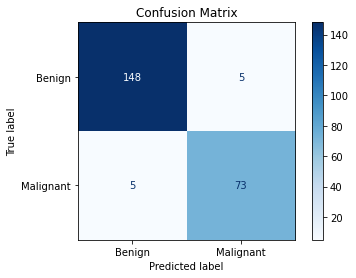

In [28]:

#5. Use the classifer to predict the outcomes of the test set (predict(x_test)). 

#Knnpredictions will contain a vector of predictions, whose correctness can be evaluated by comparing to y_test 
knnpredictions = knnmodel.predict(X_test)

#6. Computing the accuracy of the classifier by computing the accuracy score of y_test and knnpredictions
print('The accuracy score of the K-nearest Neighbours Algorithm is: ',accuracy_score(y_test, knnpredictions))

#7. We can plot the confusion matrix
# the confusion_matrix is created by comparing the predicted values (knnpredictions) against the true values (y_test)

#class_names contains the labels we would like to use. This can be ignored.
class_names  =["Benign", "Malignant"]

#You can see the documentation of the plotting function here: 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

#You can also view auto-generated examples from the scikitlearn documentation: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
disp = plot_confusion_matrix(knnmodel, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

disp.ax_.set_title("Confusion Matrix")

print(disp.confusion_matrix)

plt.show()

Let's print out the classification report to know the performance of the model across a number of performance metrics

In [29]:
print(" Classification report of the KNN model ")
print(classification_report(y_test,knnpredictions))

 Classification report of the KNN model 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.94      0.94      0.94        78

    accuracy                           0.96       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.96      0.96      0.96       231



### Reflection: 
- How well does the classifier perform? How do we read the confusion matrix? 
    - let's discuss in class
- What do all the metrics mean? and what is a confusion matrix? refer to the Towards Data Science article to understand: https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d (more on this on Day 3)



<h2 id="task1">Task 1: Implementing a KNN classifier with n = 100 </h2>
- Peform the same task above with n_neighbors=100. 
- How does the performance change? compare the confusion matrices & classification reports. 
- Which classifier is better?


In [1]:
### Your solution here ###


- The performance quickly deteriorates when k=100. This is likely due to overfitting (we'll learn more about this in day 4, but raise your hand when you get here and we can discuss in class!). 

<h2 id="task2">Task 2: Implementing an SVM classifier</h2>

Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
    
Each of these functions has its characteristics, pros and cons, and equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. 

In this exercise:
- You will implement an SVM classifier using the default Kernal RBF (Radial Basis Function). 
- Report the classification report as done for KNNs bove, and plot the confusion matrix. 
- Try a few other kernels and see if the performance improves. 
- Who's the best performer so far? SVM or KNN?




In [2]:
#### Your solution here ### 
